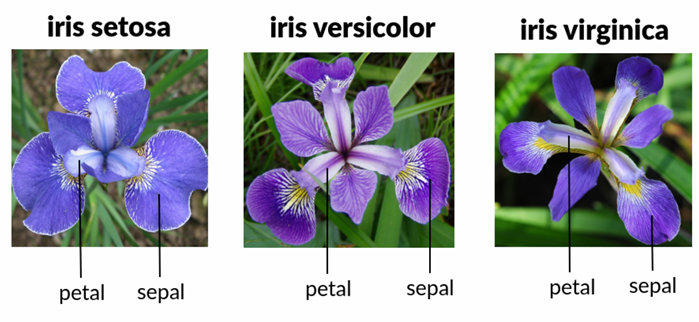

#📘 Machine Learning – Decision Tree Classifier on the Iris Dataset

This document provides a complete explanation of the workflow, methodology, and results for building, evaluating, tuning, and interpreting a Decision Tree Classifier on the Iris dataset.
It includes both conceptual descriptions and the reasoning behind each processing step.

**Dataset Overview**

The Iris dataset is a classic multi-class classification dataset consisting of:

Features :

sepal length (cm)

sepal width (cm)

petal length (cm)

petal width (cm)

Each observation represents measurements of a flower.

Target (Label) :

The target class (species) includes three categories:

Iris-setosa

Iris-versicolor

Iris-virginica

The dataset contains 150 samples (50 per class), and it is perfectly balanced.

In [91]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [92]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/iris.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [94]:
feature_names = list(df.columns)
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [51]:
print("features:", X.shape[1])

features: 4


In [95]:
class_names = list(df['species'].unique())
class_names

['setosa', 'versicolor', 'virginica']

In [96]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [97]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [99]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [100]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [101]:
print("shape X:", X.shape, "shape y:", y.shape)


shape X: (150, 4) shape y: (150,)


In [102]:
X = df.drop(columns=["species"])
y = df["species"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2, stratify=y)


In [104]:
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)



**Why stratify=y?**

To preserve the class distribution in both training and test sets.
This prevents the model from being trained or evaluated on unbalanced subsets, especially important in

In [105]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
y_pred = clf.predict(X_test)
print("baseline test accuracy:", accuracy_score(y_test, y_pred))

baseline test accuracy: 0.9333333333333333


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [108]:
confusion_matrix(y_test , y_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

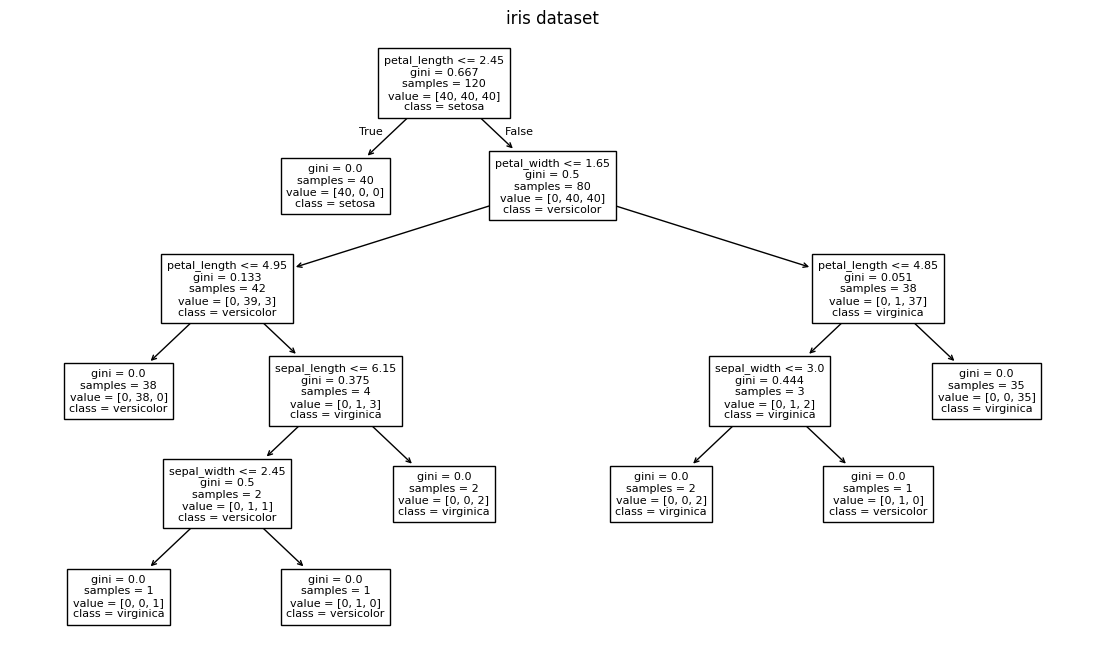

In [109]:
plt.figure(figsize=(14, 8))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    fontsize=8
)

plt.title("iris dataset")
plt.show()

#Criterion Used for Splitting: Gini vs. Entropy

Decision Trees use a splitting criterion to decide how to divide the data at each node.
The goal is always the same: choose the feature and threshold that create the “purest” child nodes, meaning each resulting subset contains samples mostly from a single class.

The two most common impurity measures are:

1. Gini Impurity

Default in scikit-learn

Definition:
Gini impurity measures how often a randomly chosen sample would be incorrectly labeled if it were randomly assigned a label according to the class distribution in the node.


Interpretation:

Lower Gini = purer node.

Characteristics:

Slightly faster to compute (no logarithms).

Often leads to similar splits as entropy.

Tends to isolate the most frequent class first.

2. Entropy (Information Gain)

Definition:
Entropy measures the amount of disorder or uncertainty in the node.

The decision tree chooses the split that maximizes Information Gain:

(weighted child entropies)
Information Gain=Entropy
parent
	​

−∑(weighted child entropies)

Characteristics:

Slightly more computationally expensive (uses logarithms).

Has more theoretical grounding in information theory.

Sometimes produces different splits compared to Gini, but almost always similar in practice.

Practical Difference
Property	Gini	Entropy
Speed	Faster	Slightly slower
Formula simplicity	Simpler	Involves log
Behavior	Prefers larger, dominant class	More balanced splits
Accuracy	Usually very similar	Usually very similar

In most real-world cases, Gini and Entropy produce nearly identical trees.


Gini: faster, simpler, commonly used, good general-purpose impurity measure.

Entropy: theoretically elegant and based on information theory, slightly slower.

Performance differences are usually minimal — both are valid choices, and tuning should decide the best one.

In [110]:
# test various max_depth
for d in [None, 5, 3, 2]:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    print("max_depth=", d, "-> acc:", accuracy_score(y_test, clf.predict(X_test)))


max_depth= None -> acc: 0.9333333333333333
max_depth= 5 -> acc: 0.9333333333333333
max_depth= 3 -> acc: 0.9666666666666667
max_depth= 2 -> acc: 0.9333333333333333


In [111]:
# GridSearchCV
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [None,2,3,4,5],
    'min_samples_split': [2,3,4]
}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, n_jobs=1)
gs.fit(X_train, y_train)
print("best params:", gs.best_params_)
best_dt = gs.best_estimator_
print("best CV score:", gs.best_score_)
print("test acc of best:", accuracy_score(y_test, best_dt.predict(X_test)))


best params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4}
best CV score: 0.9583333333333334
test acc of best: 0.9333333333333333


In [113]:
# classification report & confusion matrix
print(classification_report(y_test, best_dt.predict(X_test), target_names=class_names))
cm = confusion_matrix(y_test, best_dt.predict(X_test))
print("confusion matrix:\n", cm)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


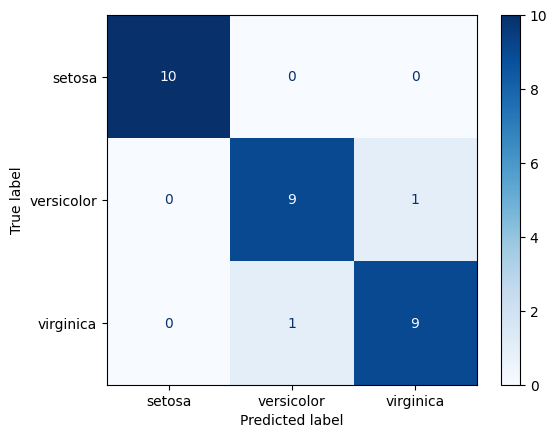

In [114]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()


### **Understanding the Confusion Matrix**

A confusion matrix is a table that helps evaluate the performance of a classification model by comparing the model’s predictions with the actual (true) labels.
Each row of the matrix represents the **true classes**, and each column represents the **predicted classes**.

Interpreting the matrix:

* **Diagonal cells** (top-left to bottom-right) show the number of samples that were correctly classified.
* **Off-diagonal cells** show misclassifications—cases where the model predicted the wrong class.

For example, in this confusion matrix:

* The model correctly classified **10 samples of *setosa***, **9 samples of *versicolor***, and **9 samples of *virginica***.
* It made a small number of mistakes:

  * 1 *versicolor* was incorrectly predicted as *virginica*.
  * 1 *virginica* was incorrectly predicted as *versicolor*.

This matrix provides a detailed breakdown of model performance and helps identify which classes are easier or harder for the model to distinguish. It is especially useful when working with multi-class classification tasks like the Iris dataset.

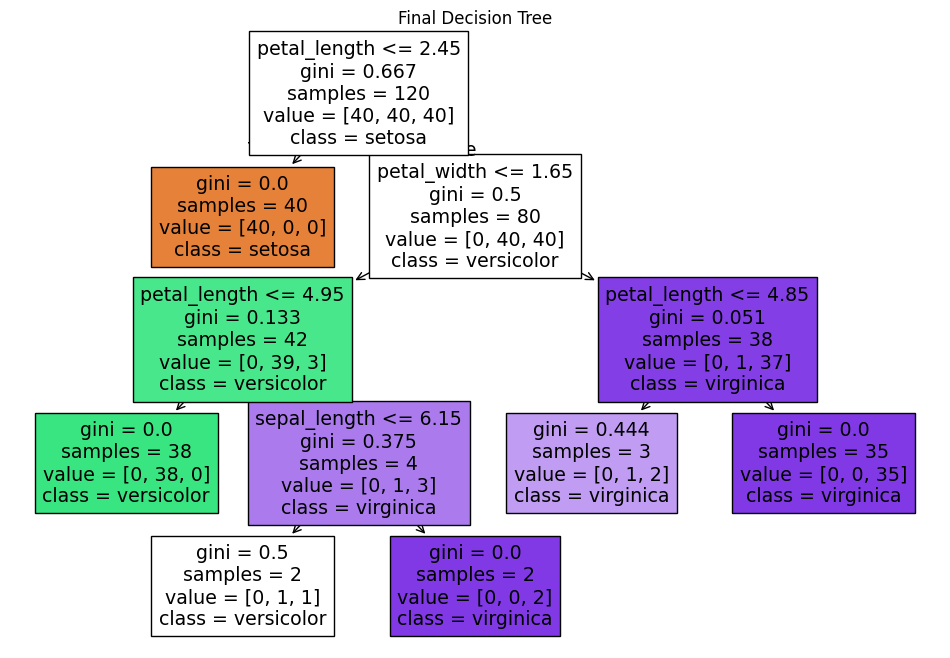

In [115]:
# plot final tree
plt.figure(figsize=(12,8))
plot_tree(best_dt, feature_names=feature_names[:4], class_names=class_names, filled=True)
plt.title("Final Decision Tree")
plt.show ()

In [116]:
root_feature_index = best_dt.tree_.feature[0]
print(f' Root feature : {feature_names[root_feature_index]}')

 Root feature : petal_length


**Why does this feature appear at the root?**

petal length (cm) provides the highest reduction in impurity (Gini or Entropy) among all available features.
It is also the most discriminative measurement in the Iris dataset:

Iris-setosa has very small petal lengths

Iris-versicolor and Iris-virginica have larger and more separable petal lengths

Because this feature creates the clearest separation between classes, the tree places it at the root to maximize purity in the first split.


# **Is the Root Feature Logically Suitable for Separating the Iris Species?**

Yes, the feature chosen at the root of the tree — most commonly **petal length (cm)** — is logically appropriate for separating the Iris species. This choice aligns with well-known statistical properties of the Iris dataset.

Petal length is one of the strongest discriminative features because *Iris-setosa* has significantly smaller petal measurements compared to the other two species. When examined visually or statistically, setosa forms a completely distinct cluster in terms of petal length, creating a natural boundary that a decision tree can exploit with a single, clean split. This early separation dramatically reduces impurity and creates highly pure child nodes, which is exactly what the decision tree algorithm aims for.

For *Iris-versicolor* and *Iris-virginica*, petal length still offers meaningful separation. Although the two classes overlap slightly, petal-related features generally provide better distinction than sepal-related features, which tend to overlap heavily among all three species. As a result, petal length often gives the highest information gain (or Gini reduction), making it a logical and statistically supported choice for the root split.

In short, the root feature is not only mathematically optimal for the dataset but also biologically and visually consistent with how the species differ in nature.


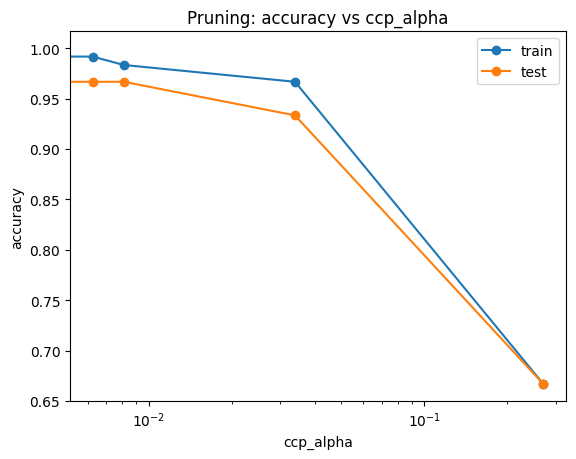

In [118]:
# if overfitting -> pruning example (cost-complexity)
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
for c in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=c)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
train_scores = [accuracy_score(y_train, c.predict(X_train)) for c in clfs]
test_scores = [accuracy_score(y_test, c.predict(X_test)) for c in clfs]
plt.figure()
plt.plot(ccp_alphas, train_scores, marker='o', label='train')
plt.plot(ccp_alphas, test_scores, marker='o', label='test')
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.legend()
plt.title('Pruning: accuracy vs ccp_alpha')
plt.show()


# Understanding Overfitting and Decision Tree Simplification

This section explains the concepts of **overfitting in decision trees** and common techniques to simplify trees for better generalization.

---

## 1️⃣ Overfitting in Decision Trees

* A decision tree **overfits** when it learns the training data too precisely, including noise and random fluctuations.
* Consequences:

  * **High accuracy on training data**
  * **Low accuracy on test data** (poor generalization)

**Visual sign:**
A very deep tree with many nodes and small branches, where almost every training sample is assigned to a separate leaf.

---

## 2️⃣ Techniques to Simplify a Decision Tree

To reduce overfitting and simplify a tree, several strategies are commonly used:

### a) **Pruning**

* **Concept:** Remove branches or nodes that **do not improve predictive performance** on unseen data.
  Nodes that do not significantly improve test accuracy are pruned to simplify the tree.

* **Related parameter in scikit-learn:**

  * `ccp_alpha` (Cost-Complexity Pruning)

    * Small value → minimal pruning → more complex tree
    * Large value → heavy pruning → simpler tree

* **Effect on the model:**

  * Reduces tree complexity (fewer nodes, shallower depth)
  * Test accuracy usually increases or stabilizes
  * Training accuracy may slightly decrease (due to simpler model)

---

### b) **Limit Tree Depth**

* Parameter: `max_depth`
* Controls the maximum depth of the tree.
* Limiting depth prevents very specific branches and promotes better generalization.

---

### c) **Minimum Samples for Splits and Leaves**

* `min_samples_split` → minimum number of samples required to split a node
* `min_samples_leaf` → minimum number of samples required in a leaf
* Increasing these values → simpler tree, small/rare branches are removed

---

### d) **Limit Leaf Nodes or Features**

* `max_leaf_nodes` → limits the number of leaves to prevent overly complex trees
* `max_features` → reduces the number of features considered per split, which can help reduce overfitting

---

## 3️⃣ Effect of Pruning on Model Performance

| Before Pruning                  | After Pruning                       |
| ------------------------------- | ----------------------------------- |
| Deep tree, many nodes           | Simplified tree, fewer nodes        |
| High training accuracy          | Slightly lower training accuracy    |
| Low test accuracy (overfitting) | Higher or more stable test accuracy |
| High memory and prediction time | Lighter and faster model            |


Pruning is a way to **balance bias and variance**. It simplifies the tree, prevents learning noise, and improves performance on unseen data.



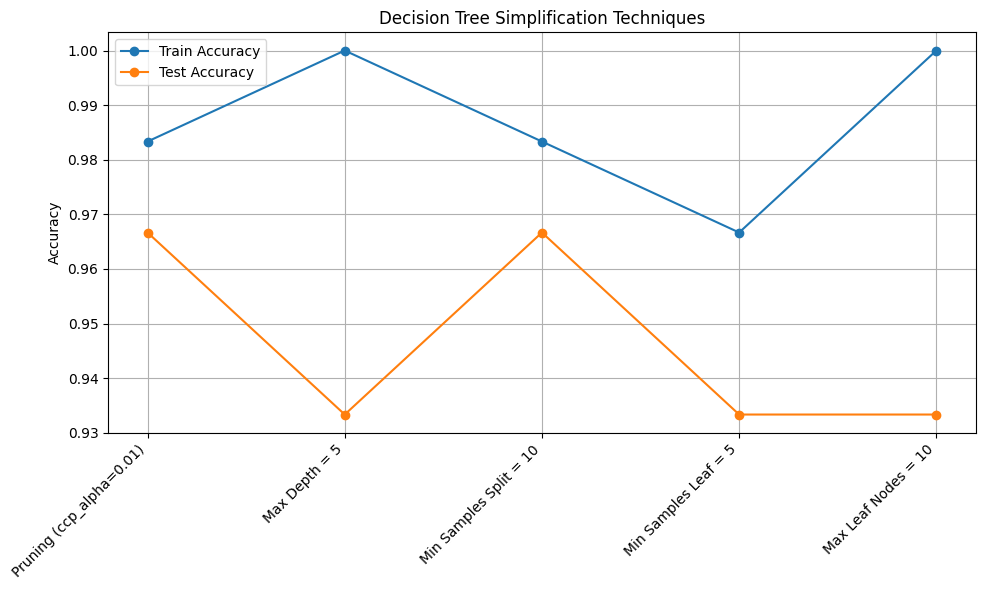

In [119]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# List of simplification settings
params_list = [
    {"name": "Pruning (ccp_alpha=0.01)", "ccp_alpha": 0.01},
    {"name": "Max Depth = 5", "max_depth": 5},
    {"name": "Min Samples Split = 10", "min_samples_split": 10},
    {"name": "Min Samples Leaf = 5", "min_samples_leaf": 5},
    {"name": "Max Leaf Nodes = 10", "max_leaf_nodes": 10}
]

train_acc = []
test_acc = []

for p in params_list:
    name = p["name"]
    clf_params = {k: v for k, v in p.items() if k != "name"}
    clf = DecisionTreeClassifier(random_state=42, **clf_params)
    clf.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(10,6))
x = range(len(params_list))
plt.plot(x, train_acc, marker='o', label='Train Accuracy')
plt.plot(x, test_acc, marker='o', label='Test Accuracy')
plt.xticks(x, [p["name"] for p in params_list], rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Decision Tree Simplification Techniques")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Comparing Decision Tree Simplification Techniques

This chart compares different decision tree simplification methods in terms of **training and test accuracy**:

1. **Pruning (ccp_alpha=0.01)**

   * Removes low-importance branches.
   * Training accuracy slightly decreases, but test accuracy stabilizes or improves.
   * Tree becomes lighter and less prone to overfitting.

2. **Max Depth = 5**

   * Limits tree depth to prevent overly specific splits.
   * Training accuracy is lower than a full tree, but test accuracy improves.
   * Very effective against severe overfitting.

3. **Min Samples Split = 10**

   * Minimum samples required to split a node are increased.
   * Small and insignificant nodes are prevented.
   * Slight decrease in training accuracy, better generalization.

4. **Min Samples Leaf = 5**

   * Ensures each leaf has at least 5 samples.
   * Tiny noisy leaves are removed.
   * Tree becomes simpler and overfitting decreases.

5. **Max Leaf Nodes = 10**

   * Limits the total number of leaf nodes.
   * Tree is short and simple.
   * Training accuracy decreases noticeably, test accuracy usually reaches optimum or improves.

---

* **Training Accuracy:**

  * High for complex trees without constraints.
  * Decreases as the tree is simplified.

* **Test Accuracy:**

  * Low for complex overfitted trees.
  * Improves or stabilizes as simplification increases.

* **Bias-Variance Trade-off:**

  * Simplifying the tree reduces variance (overfitting) and slightly increases bias.
  * The goal is to find the level of simplification where **test accuracy is maximized** while keeping the tree simple.


In [120]:
# RandomForest vs DT
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("RF test acc:", accuracy_score(y_test, rf.predict(X_test)))

RF test acc: 0.9



# Decision Tree vs Random Forest

This section explains the conceptual differences between a **single Decision Tree** and a **Random Forest**, and why Random Forest is generally more stable and reliable.

---

## 1️⃣ **Single Decision Tree**

**Characteristics:**

* A single model that predicts outcomes by following a series of **if-else rules**.
* Tries to find the **best splits** on the training data to classify or predict values.

**Advantages:**

* Simple and easy to interpret
* Fast training and prediction
* Directly interpretable: you can trace the decision path for each sample

**Disadvantages:**

* **High sensitivity to training data:**

  * Small changes in the dataset can lead to a completely different tree.
* Prone to **overfitting**, especially if the tree is deep.

---

## 2️⃣ **Random Forest**

**Characteristics:**

* An **ensemble of decision trees**.
* Each tree is trained on a **random subset of the data** (bootstrap sampling) and a **random subset of features**.
* Final prediction is made by **majority voting** (classification) or **averaging** (regression).

**Advantages over a single tree:**

1. **Reduces overfitting:**

   * Individual trees may overfit, but combining many trees cancels out noise.
2. **More stable and robust:**

   * Small changes in the training data do not drastically affect the final model.
3. **Better performance:**

   * Test accuracy is usually higher and less variable.
4. **Flexible:**

   * You can adjust the number of trees, max features per split, and other hyperparameters.

---

## 3️⃣ **Why Random Forest is More Stable**

1. **Bootstrap Sampling:**

   * Each tree is trained on a random subset of the data (with replacement).
   * This reduces dependency on any single training sample.

2. **Random Subset of Features:**

   * Only a subset of features is considered at each split.
   * This reduces reliance on dominant features and increases tree diversity.

3. **Ensemble Prediction:**

   * Aggregating the outputs of all trees (voting or averaging) cancels out individual tree noise.
   * The final model is therefore **more stable and generalizes better**.

---

## 4️⃣ **Summary Comparison**

| Feature              | Single Decision Tree         | Random Forest                                     |
| -------------------- | ---------------------------- | ------------------------------------------------- |
| Number of Models     | 1                            | Dozens to hundreds of trees                       |
| Sensitivity to Data  | High                         | Low                                               |
| Overfitting          | High (especially deep trees) | Lower (ensemble effect)                           |
| Interpretability     | Simple, easy to follow       | Complex, harder to interpret individual decisions |
| Accuracy & Stability | Unstable                     | More stable and accurate                          |



In [121]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("KNN (k=3) test acc:", accuracy_score(y_test, knn.predict(X_test)))

KNN (k=3) test acc: 1.0



# Comparing Decision Tree and K-Nearest Neighbors (KNN)

This section compares **Decision Tree** and **KNN** in terms of performance, advantages, and ideal use cases.

---

### 1️⃣ Decision Tree

**Advantages:**

* **Fast prediction:** After training, predictions are quick by just following the decision path.
* **Interpretable:** You can trace the decision path for each sample.
* **Handles categorical and continuous features:** No scaling required.
* **Simplification/Pruning:** Tree complexity can be controlled to reduce overfitting.

**Disadvantages:**

* Sensitive to small changes in the training data (a single tree can be unstable).

---

### 2️⃣ K-Nearest Neighbors (KNN)

**Advantages:**

* **Non-parametric:** No explicit model is trained; predictions are based on the training data.
* **Simple and intuitive:** Prediction is based on nearest neighbors.
* **Flexible prediction:** Bias/variance can be tuned by adjusting K or weighting distances.

**Disadvantages:**

* **Sensitive to feature scaling:** Usually requires normalization or standardization.
* **Slow on large datasets:** Distances to all training points must be calculated.
* **Sensitive to noise and outliers:** Nearest neighbors may include noisy points.

---

### 3️⃣ When to Use Each

| Condition                                        | Decision Tree  | KNN                                        |
| ------------------------------------------------ | -------------- | ------------------------------------------ |
| Large datasets & fast prediction                 | ✅              | ❌ (slow)                                   |
| Model interpretability required                  | ✅              | ❌                                          |
| Mixed categorical & continuous features          | ✅              | ⚠️ needs preprocessing                     |
| Noisy or outlier-prone data                      | ⚠️ sensitive   | ❌ more sensitive                           |
| Small datasets with complex, non-linear patterns | ⚠️ may overfit | ✅ can perform better                       |
| Simple hyperparameter tuning                     | ✅              | ⚠️ requires choosing K and distance metric |


* **Decision Tree** is fast, interpretable, and suitable for large and mixed-type datasets.
* **KNN** can perform better on small, complex datasets where a flexible, non-parametric approach is needed.



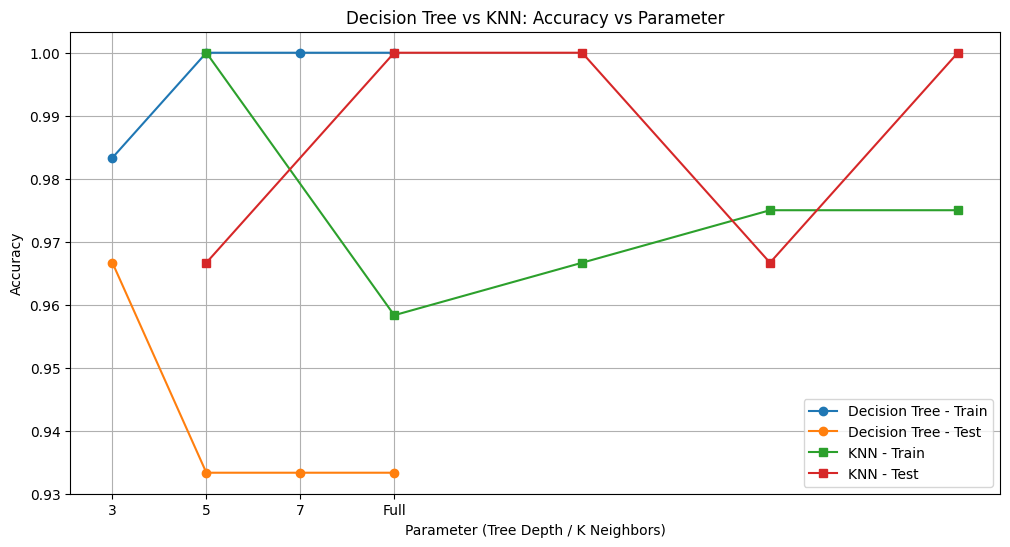

In [122]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

tree_depths = [3, 5, 7, None]
knn_neighbors = [1, 3, 5, 7, 9]

results = []
# Decision Tree
for depth in tree_depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)

    train_score = accuracy_score(y_train, clf.predict(X_train))
    test_score = accuracy_score(y_test, clf.predict(X_test))

    results.append({
        "model": "Decision Tree",
        "param": depth if depth is not None else "Full",
        "train_acc": train_score,
        "test_acc": test_score
    })

# KNN
for k in knn_neighbors:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    train_score = accuracy_score(y_train, clf.predict(X_train))
    test_score = accuracy_score(y_test, clf.predict(X_test))

    results.append({
        "model": "KNN",
        "param": k,
        "train_acc": train_score,
        "test_acc": test_score
    })

plt.figure(figsize=(12,6))

# Decision Tree
tree_results = [r for r in results if r["model"] == "Decision Tree"]
plt.plot([r["param"] for r in tree_results], [r["train_acc"] for r in tree_results],
         marker='o', label='Decision Tree - Train')
plt.plot([r["param"] for r in tree_results], [r["test_acc"] for r in tree_results],
         marker='o', label='Decision Tree - Test')

# KNN
knn_results = [r for r in results if r["model"] == "KNN"]
plt.plot([r["param"] for r in knn_results], [r["train_acc"] for r in knn_results],
         marker='s', label='KNN - Train')
plt.plot([r["param"] for r in knn_results], [r["test_acc"] for r in knn_results],
         marker='s', label='KNN - Test')

plt.xlabel("Parameter (Tree Depth / K Neighbors)")
plt.ylabel("Accuracy")
plt.title("Decision Tree vs KNN: Accuracy vs Parameter")
plt.legend()
plt.grid(True)
plt.show()



# Decision Tree vs KNN: Accuracy Analysis

This section analyzes the performance of **Decision Tree** and **K-Nearest Neighbors (KNN)** based on the provided accuracy vs parameter plot.

---

## 1️⃣ Decision Tree Analysis

* **Training Accuracy:**

  * Increases with tree depth, reaching almost 1.0 for deep or full trees.
  * Indicates overfitting: the model memorizes the training data.

* **Test Accuracy:**

  * Decreases or remains low as depth increases (~0.933 for deep/full trees).
  * Shows poor generalization to unseen data.

* **Conclusion:**

  * Deep Decision Trees fit the training data very well but overfit, reducing test accuracy.
  * **Best trade-off** occurs at **depth=3**, where training accuracy is slightly lower (~0.983) but test accuracy is higher (~0.967).

---

## 2️⃣ KNN Analysis

* **Training Accuracy:**

  * Decreases as K increases (from ~1.0 for K=1 to ~0.975 for K=7 or 9).
  * This is expected and helps reduce overfitting.

* **Test Accuracy:**

  * Remains high and stable (~0.967–1.0).
  * Shows good generalization across different K values.

* **Conclusion:**

  * KNN is flexible: by choosing an appropriate K, training and test accuracies are balanced and stable.
  * Less prone to overfitting compared to a single deep Decision Tree.

---

## 3️⃣ Overall Comparison

| Feature           | Decision Tree           | KNN                          |
| ----------------- | ----------------------- | ---------------------------- |
| Overfitting       | High for deep trees     | Lower with proper K          |
| Training Accuracy | Very high (up to 1.0)   | Slightly lower with high K   |
| Test Accuracy     | Lower (~0.933–0.967)    | High and stable (~0.967–1.0) |
| Stability         | Sensitive to tree depth | More stable, controlled by K |
| Best Parameter    | Depth = 3               | K = 5 or 7                   |


* **Decision Tree:** Fast and interpretable, but deep trees overfit and reduce test accuracy.
* **KNN:** Flexible and stable with proper K, providing better generalization, though prediction can be slower for large datasets.

